PARCIAL 2 

VISUALIZACION COMUNIDADES (ALGORITMO DE LOUVAIN)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
import random
import networkx as nx
import pandas as pd

In [3]:
df= pd.read_csv("World.csv")
df.head()

,Origen,Destino,ConexionAeropuertos
0,Papua New Guinea,Australia,19
1,Papua New Guinea,Philippines,5
2,Papua New Guinea,Indonesia,2
3,Papua New Guinea,Solomon Islands,2
4,Papua New Guinea,Hong Kong,2


In [4]:
flights_graph = nx.from_pandas_edgelist(df, source= "Origen",target= "Destino")

In [5]:
print(flights_graph)

Graph with 229 nodes and 2852 edges


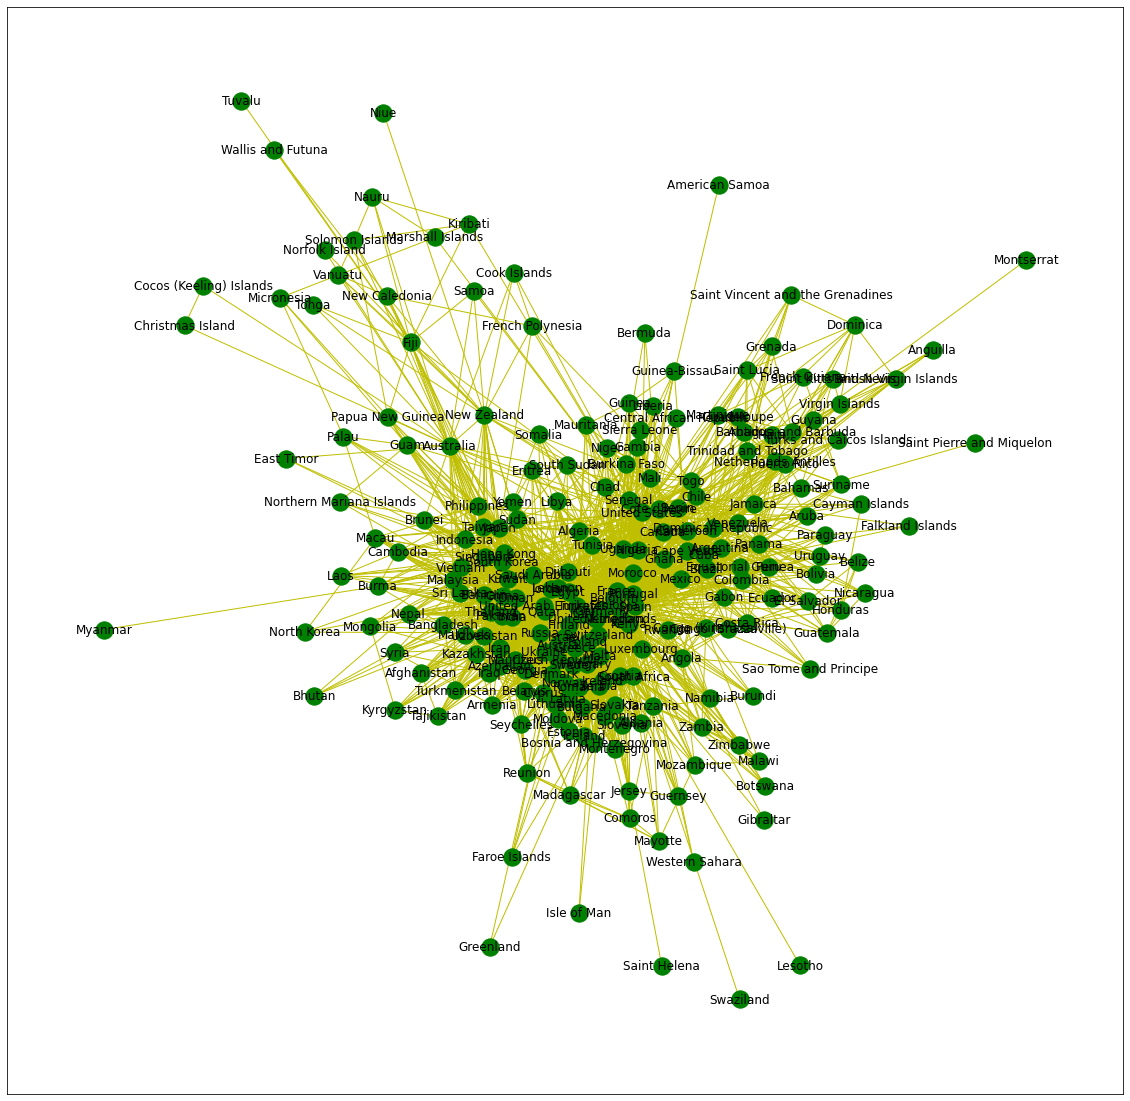

In [6]:
plt.figure(figsize=(20,20))
nx.draw_networkx(flights_graph, with_labels = True, node_color= 'g', edge_color='y')


In [7]:
import networkx.algorithms.community as nx_comm
communities= nx_comm.louvain_communities(flights_graph, seed=123)
print("Cantidad de comunidades detectadas:",len(communities))

Cantidad de comunidades detectadas: 4


In [8]:
for i in range(len(communities)):
    print("Comunidad ------>",i,":\n",communities[i])

Comunidad ------> 0 :
 {'Gabon', 'Mozambique', 'Sao Tome and Principe', 'Niger', 'Tanzania', 'Mauritius', 'Eritrea', 'South Africa', 'Congo (Kinshasa)', 'Senegal', 'Guinea-Bissau', 'Zimbabwe', 'Algeria', "Cote d'Ivoire", 'Mauritania', 'Gibraltar', 'Togo', 'Malawi', 'France', 'Liberia', 'Seychelles', 'Burundi', 'Comoros', 'Equatorial Guinea', 'Yemen', 'Sierra Leone', 'Zambia', 'Botswana', 'Mali', 'Madagascar', 'Cameroon', 'Western Sahara', 'Benin', 'Ethiopia', 'Chad', 'Congo (Brazzaville)', 'South Sudan', 'Reunion', 'Rwanda', 'Swaziland', 'Kenya', 'Somalia', 'Central African Republic', 'Burkina Faso', 'Libya', 'Uganda', 'Gambia', 'Morocco', 'Mayotte', 'Nigeria', 'Cape Verde', 'Namibia', 'Lesotho', 'Turkey', 'Angola', 'Guinea', 'Ghana', 'Tunisia', 'Sudan', 'Djibouti'}
Comunidad ------> 1 :
 {'Greenland', 'Egypt', 'Albania', 'Russia', 'Saint Helena', 'Cyprus', 'Jordan', 'United Kingdom', 'Faroe Islands', 'Israel', 'Moldova', 'Croatia', 'Macedonia', 'Luxembourg', 'Georgia', 'Romania', 'Hun

In [9]:
for i in range(len(communities)):
    print("Cantidad de nodos en la comunidad -------->",i,":",len(communities[i]))

Cantidad de nodos en la comunidad --------> 0 : 60
Cantidad de nodos en la comunidad --------> 1 : 51
Cantidad de nodos en la comunidad --------> 2 : 54
Cantidad de nodos en la comunidad --------> 3 : 64


In [10]:
def visualizar_comunidades(community, number, node_color):
    G=nx.Graph()
    G=flights_graph.subgraph(list(community))
    print("Visualizacion Comunidad:",number,"\n")
    plt.figure(figsize=(20,20))
    nx.draw_networkx(G, with_labels = True, node_color= node_color, edge_color='m')

Visualizacion Comunidad: 0 



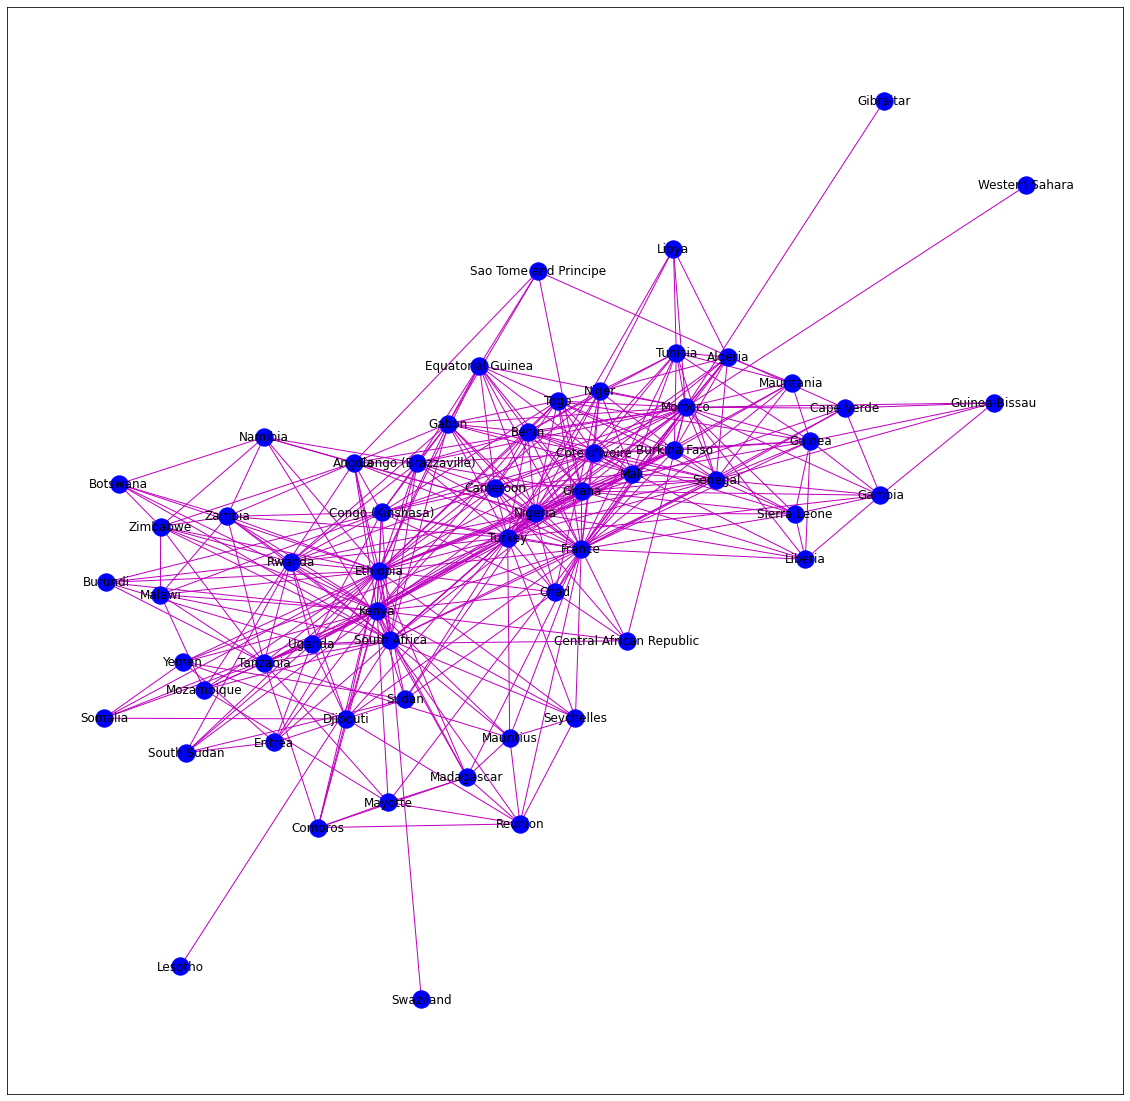

In [11]:
visualizar_comunidades(communities[0],0,'b')

Visualizacion Comunidad: 1 



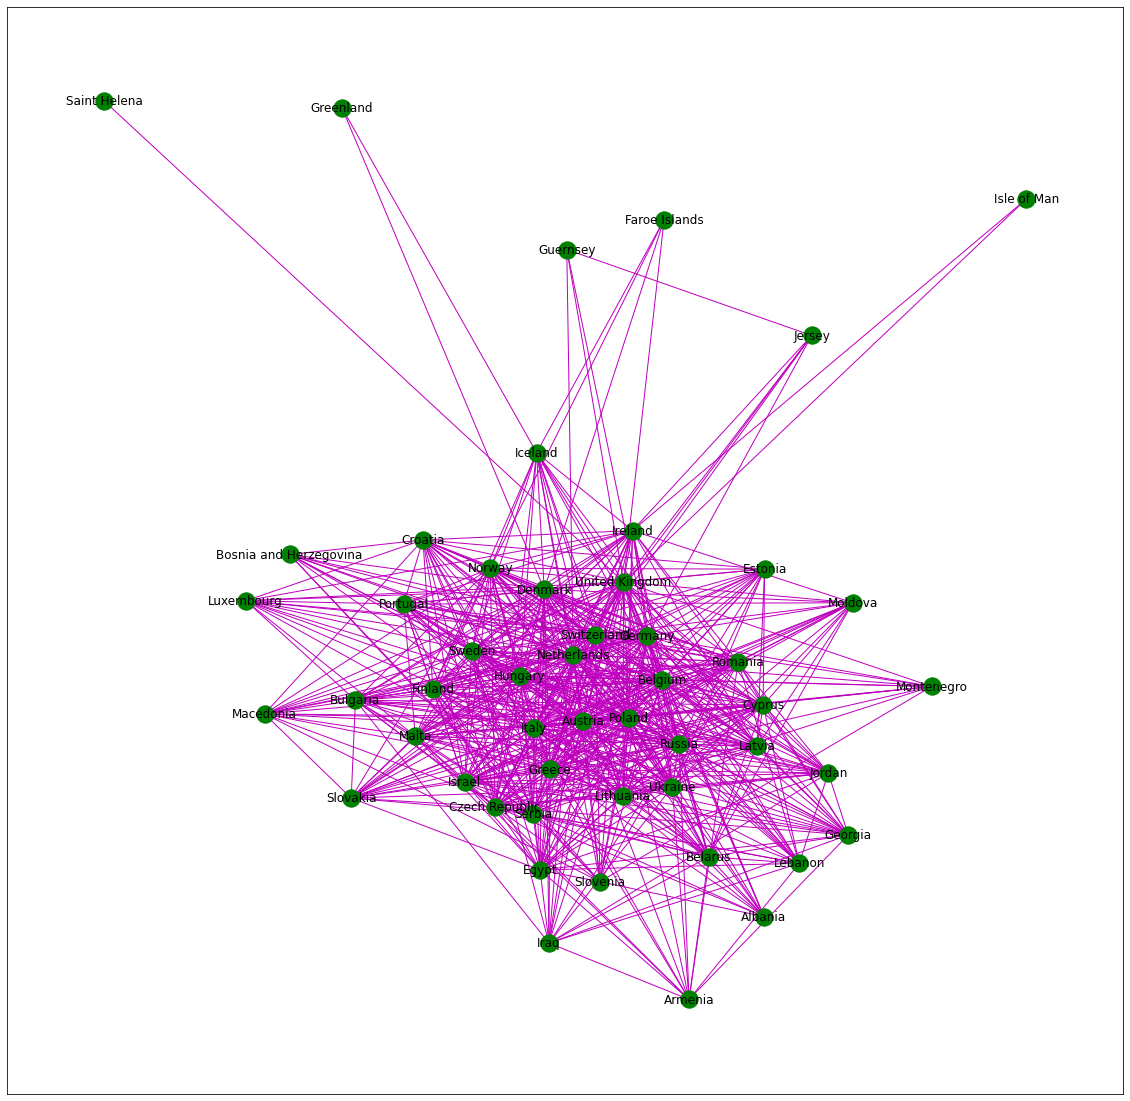

In [12]:
visualizar_comunidades(communities[1],1,'g')

Visualizacion Comunidad: 2 



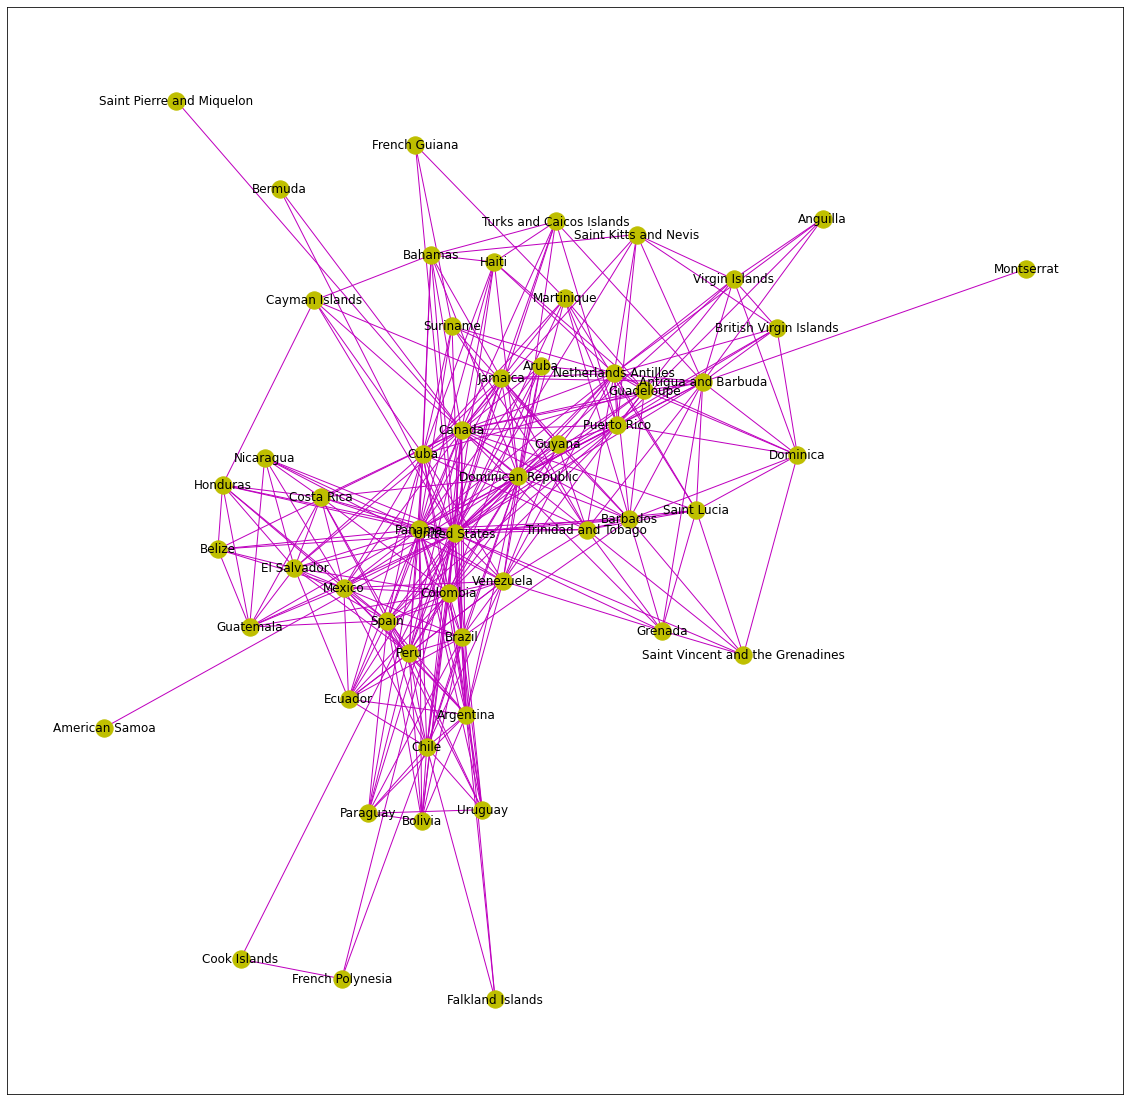

In [13]:
visualizar_comunidades(communities[2],2,'y')

Visualizacion Comunidad: 3 



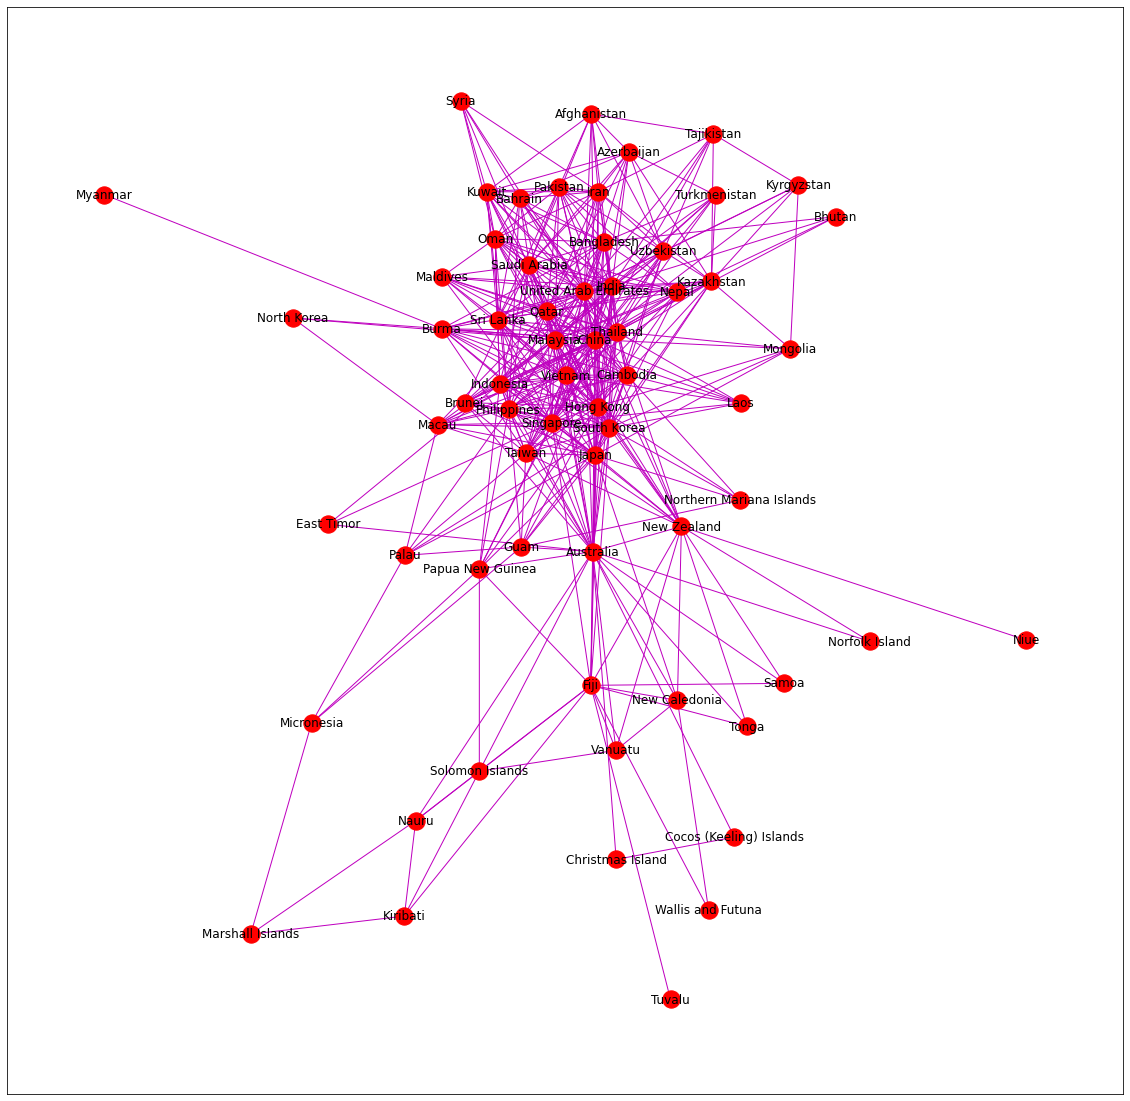

In [14]:
visualizar_comunidades(communities[3],3,'r')

In [111]:
def aristas_que_cruzan(communitie, G):
    total=0
    nodo_actual=0
    vecinos = []
    subgraph=nx.Graph()
    subgraph= flights_graph.subgraph(list(communitie))
    for i in range(len(communitie)):
        nodo_actual= communitie[i]
        vecinos = list(G.neighbors(nodo_actual))
        for j in range(len(vecinos)):
            if not subgraph.has_node(vecinos[j]) :
                total= total +1
                
        
    return total

In [112]:
sum=0
for i in range(len(communities)):    
    print("Cantidad de aristas que cruzan de la comunidad",i,"-------->",aristas_que_cruzan(list(communities[i]), flights_graph))
    sum = sum +(aristas_que_cruzan(list(communities[i]), flights_graph))
print("Cantidad total de aristas que cruzan -------->",sum/2)    

Cantidad de aristas que cruzan de la comunidad 0 --------> 488
Cantidad de aristas que cruzan de la comunidad 1 --------> 747
Cantidad de aristas que cruzan de la comunidad 2 --------> 295
Cantidad de aristas que cruzan de la comunidad 3 --------> 546
Cantidad total de aristas que cruzan --------> 1038.0


SUBCOMUNIDADES 

SUBCOMUNIDAD ----> Proveniente de COMUNIDAD 0

In [86]:
subgraph=nx.Graph()
subgraph= flights_graph.subgraph(list(communities[0]))
sub_communities= nx_comm.louvain_communities(subgraph, seed=123)
print("Cantidad de sub comunidades detectadas:",len(sub_communities))

Cantidad de sub comunidades detectadas: 4


In [88]:
for i in range(len(sub_communities)):
    print("Comunidad ------>",i,":\n",sub_communities[i])

Comunidad ------> 0 :
 {'South Sudan', 'Mozambique', 'Rwanda', 'Tanzania', 'Kenya', 'Eritrea', 'South Africa', 'Uganda', 'Zimbabwe', 'Namibia', 'Malawi', 'Lesotho', 'Burundi', 'Comoros', 'Angola', 'Yemen', 'Sudan', 'Zambia', 'Botswana', 'Swaziland', 'Djibouti', 'Ethiopia', 'Somalia'}
Comunidad ------> 1 :
 {'Chad', 'Congo (Kinshasa)', 'Congo (Brazzaville)', 'Gabon', 'Central African Republic', 'Cameroon'}
Comunidad ------> 2 :
 {'Sao Tome and Principe', 'Niger', 'Burkina Faso', 'Libya', 'Gambia', 'Morocco', 'Guinea-Bissau', 'Senegal', 'Algeria', 'Gibraltar', 'Mauritania', 'Nigeria', "Cote d'Ivoire", 'Cape Verde', 'Turkey', 'Liberia', 'Togo', 'Equatorial Guinea', 'Western Sahara', 'Sierra Leone', 'Guinea', 'Ghana', 'Tunisia', 'Mali', 'Benin'}
Comunidad ------> 3 :
 {'Seychelles', 'France', 'Reunion', 'Mayotte', 'Madagascar', 'Mauritius'}


In [90]:
for i in range(len(sub_communities)):
    print("Cantidad de nodos en la comunidad -------->",i,":",len(sub_communities[i]))

Cantidad de nodos en la comunidad --------> 0 : 23
Cantidad de nodos en la comunidad --------> 1 : 6
Cantidad de nodos en la comunidad --------> 2 : 25
Cantidad de nodos en la comunidad --------> 3 : 6


Visualizacion Comunidad: 0 



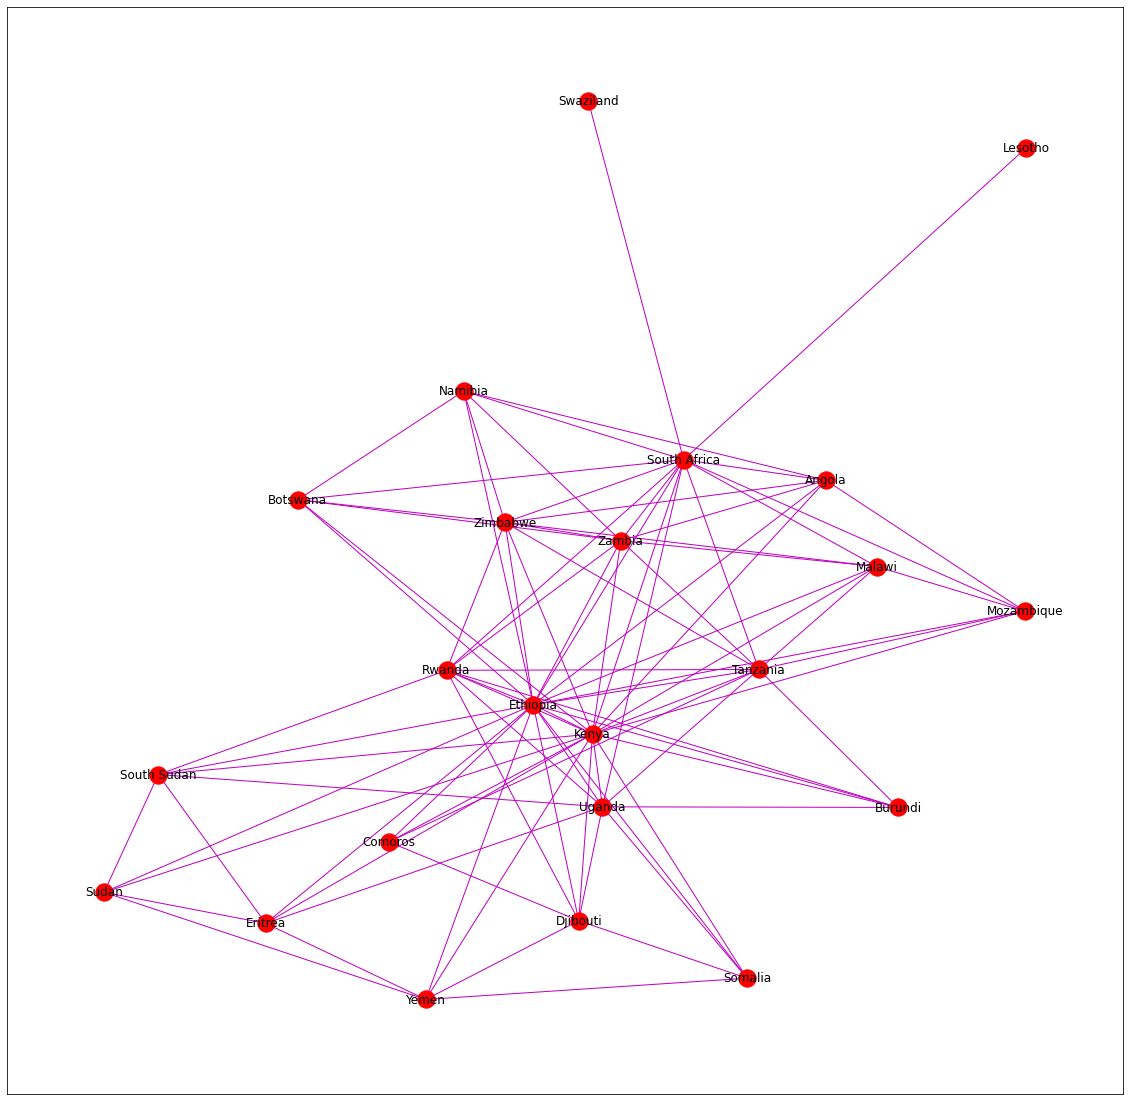

In [91]:
visualizar_comunidades(sub_communities[0],0,'r')

Visualizacion Comunidad: 1 



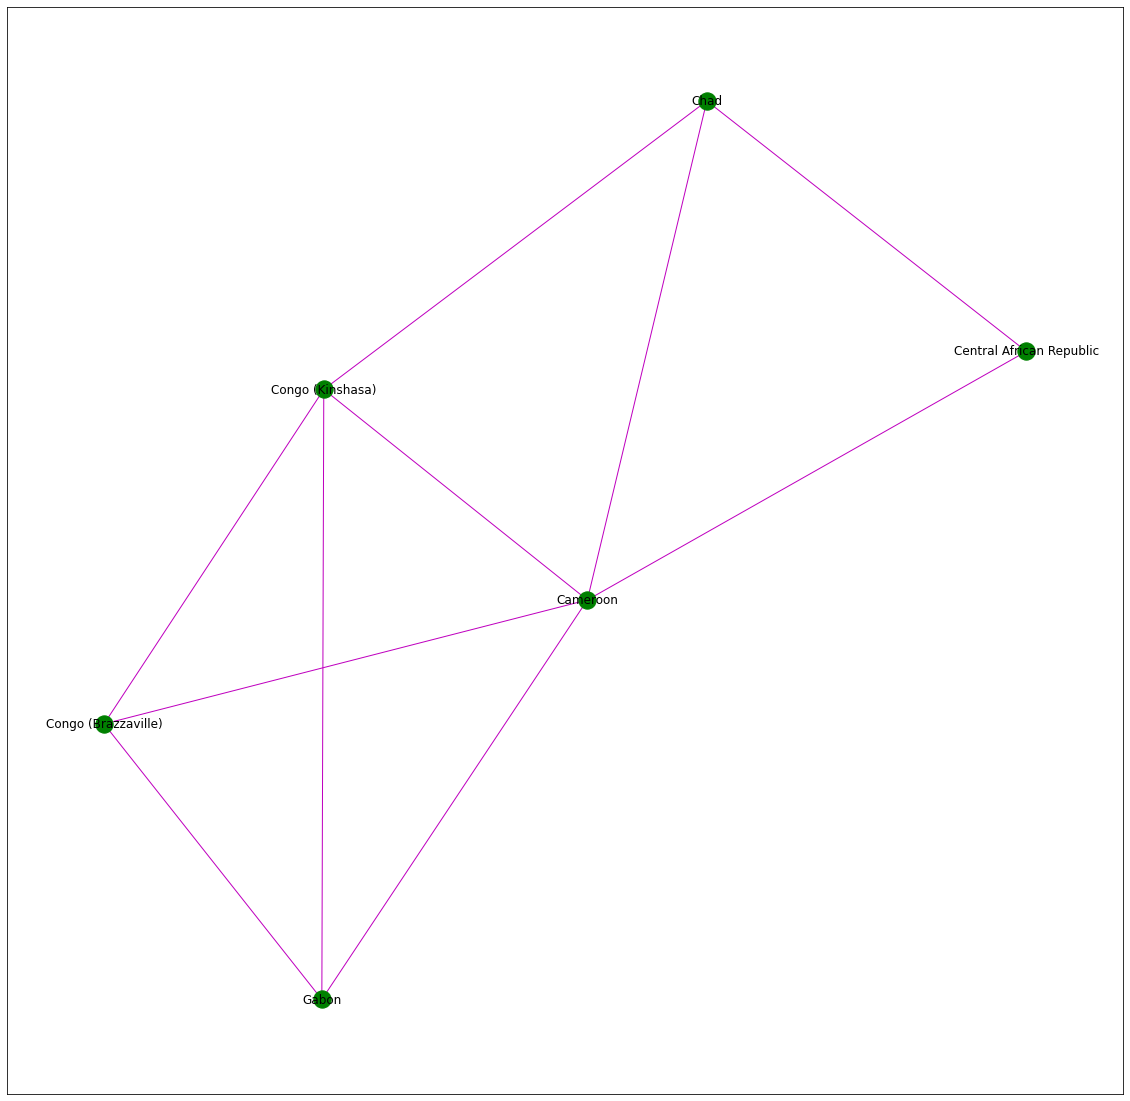

In [93]:
visualizar_comunidades(sub_communities[1],1,'g')

Visualizacion Comunidad: 2 



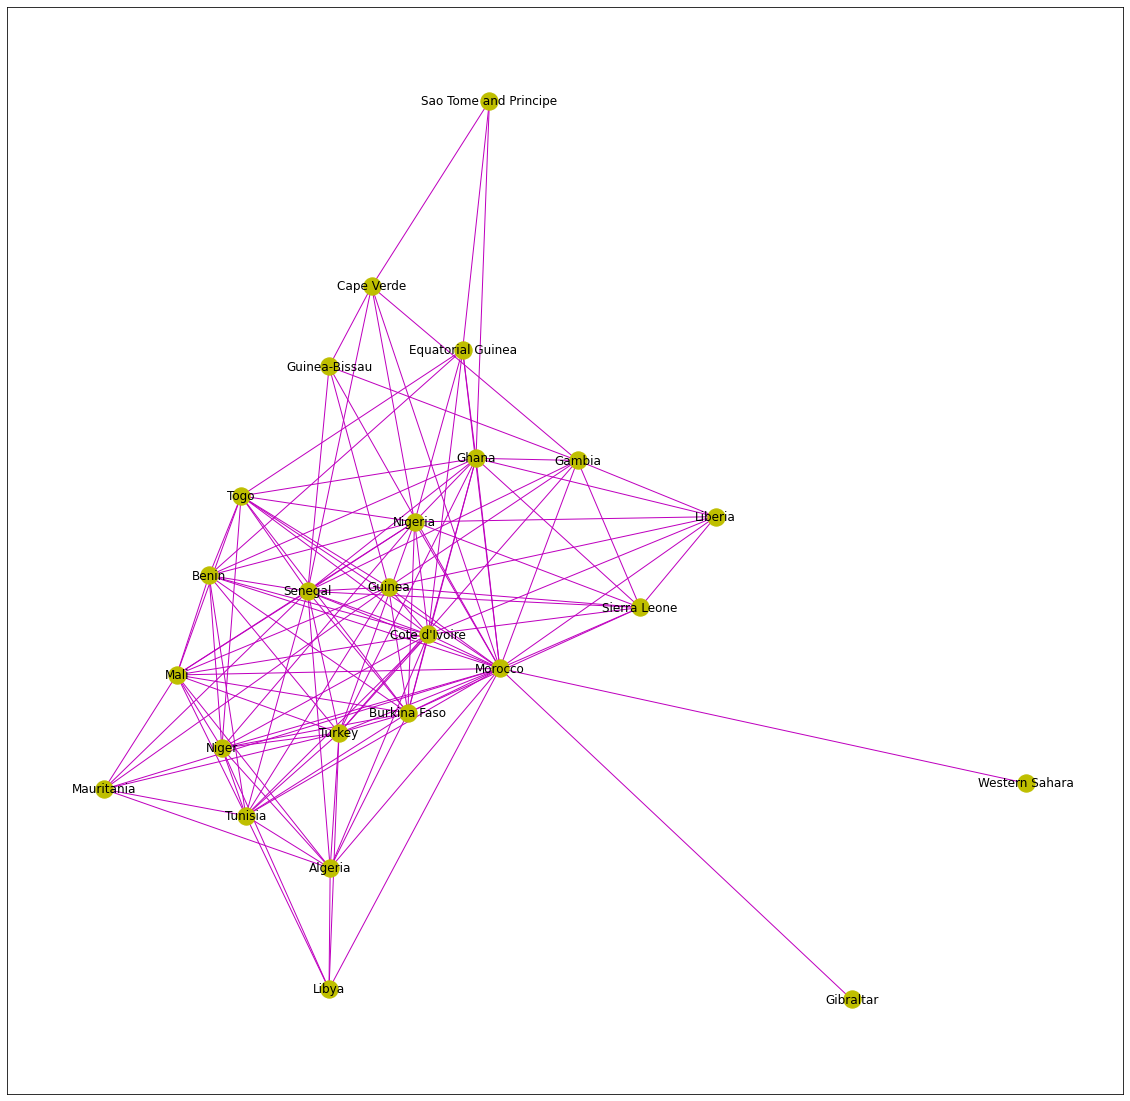

In [94]:
visualizar_comunidades(sub_communities[2],2,'y')

Visualizacion Comunidad: 3 



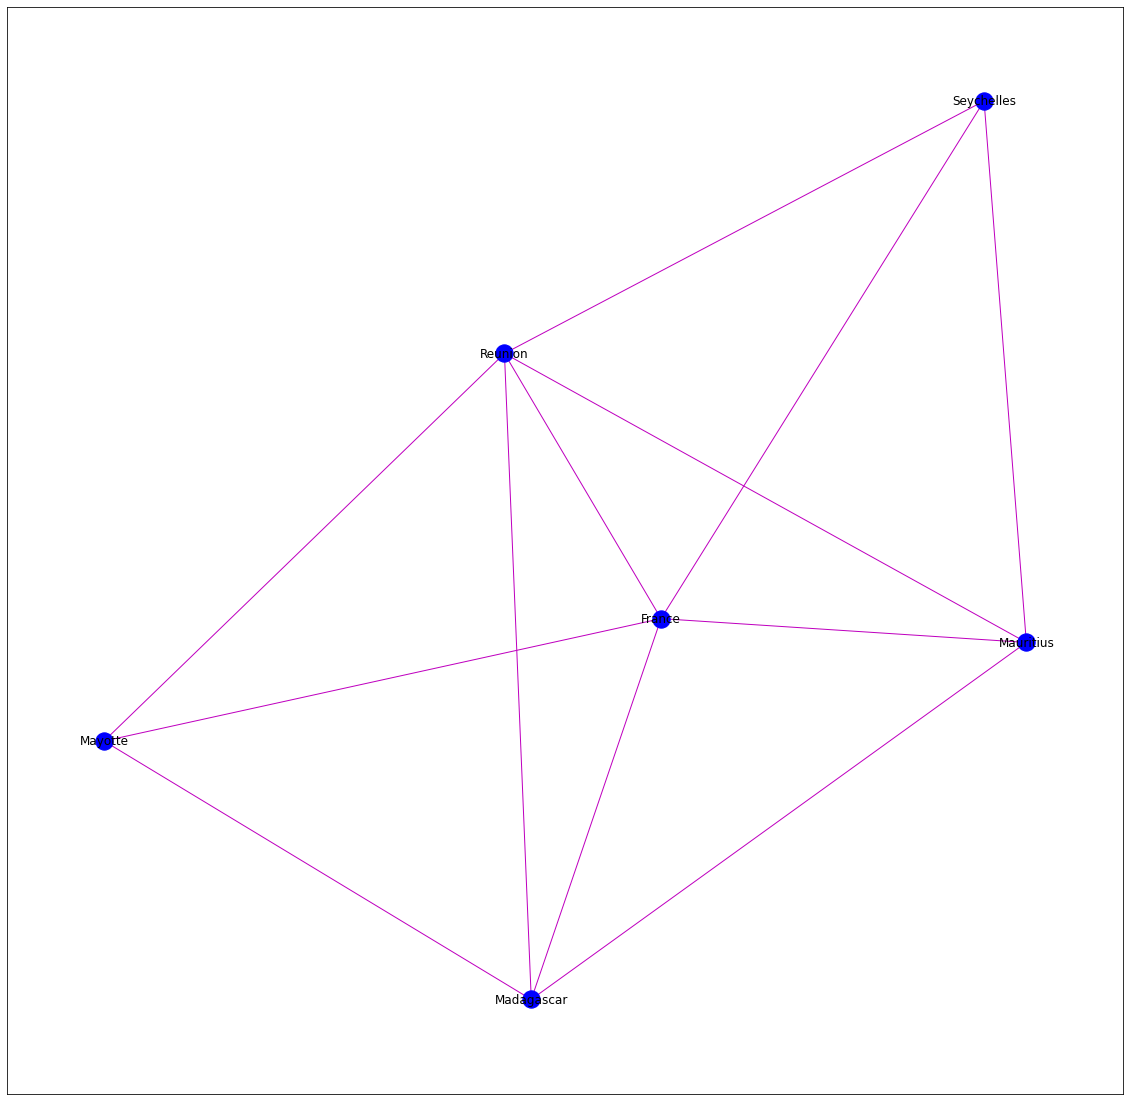

In [95]:
visualizar_comunidades(sub_communities[3],3,'b')